In [1]:
!git clone https://github.com/davidroad/BMI_7320_Tutorial.git

Cloning into 'BMI_7320_Tutorial'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 81 (delta 5), reused 0 (delta 0), pack-reused 63
Receiving objects: 100% (81/81), 4.94 MiB | 24.44 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [3]:
import sys

In [4]:
sys.path.insert(0,"/content/BMI_7320_Tutorial/23_GBM_AP1")

In [11]:
!gdown https://drive.google.com/uc?id=1S-8Fsly0Z86SoAQPr24fvrDTepHPkjz5 -O /content/BMI_7320_Tutorial/23_GBM_AP1/data/GBM_AP1_treatment.h5ad
!mkdir -P save_model
!mkdir -P data

Downloading...
From: https://drive.google.com/uc?id=1S-8Fsly0Z86SoAQPr24fvrDTepHPkjz5
To: /content/BMI_7320_Tutorial/23_GBM_AP1/data/GBM_AP1_treatment.h5ad
100% 300M/300M [00:06<00:00, 45.9MB/s]


In [5]:
 ! pip install scanpy
 ! pip install torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=d25360a39fd076f3d2e32c3dfc3c48997c5a9f1ccf653d54a771d66265e1a4d0
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=c5bc32ec205b09af784f77d5653761008c1cd4f23fb2ddd9b445d4edff2b9e80
  Stored in directory: /root/.cache/pip/wheels/6a

In [7]:
import torch
from vega_model import VEGA
from utils import *
from learning_utils import *
import scanpy as sc
from scipy import sparse
from sklearn import preprocessing
import numpy as np
import itertools
import argparse
import os
import pandas as pd

In [12]:
data_path= '/content/BMI_7320_Tutorial/23_GBM_AP1/data/'

finding the data file to be trained


In [13]:
train_file_list=os.listdir(data_path)
train_file_list=[i for i in train_file_list if '.h5ad' in i]

In [14]:
train_file_list

['GBM_AP1_treatment.h5ad']

In [15]:
train_data = sc.read(data_path +train_file_list[0])

/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/anndata/compat/__init__.py:298: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [16]:
print(train_data)


AnnData object with n_obs × n_vars = 3593 × 10000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'primary.predict', 'secondary.predict', 'label'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_UMAP', 'X_pca'
    varm: 'PCs'
    obsp: 'distances'


In [31]:
train_data.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters,primary.predict,secondary.predict,label
T5224_10uM_3days_AAACCCACAACTGATC,T5224,2969.0,1821,3273.0,1817,2,2,G2/M phase MFAP5+IGFBP6+ fibroblast--adipose,G2/M phase MFAP5+IGFBP6+ fibroblast--fibroblast,Treatment
T5224_10uM_3days_AAACGCTGTCGCATTA,T5224,1087.0,811,2863.0,1015,2,2,G2/M phase MFAP5+IGFBP6+ fibroblast--adipose,G2/M phase MFAP5+IGFBP6+ fibroblast--fibroblast,Treatment
T5224_10uM_3days_AAACGCTTCCCTTCCC,T5224,1063.0,857,2807.0,1110,4,4,G2/M phase MFAP5+IGFBP6+ fibroblast--adipose,G2/M phase MFAP5+IGFBP6+ fibroblast--fibroblast,Treatment
T5224_10uM_3days_AAAGAACCACCTCGTT,T5224,1077.0,811,2843.0,1054,2,2,G2/M phase MFAP5+IGFBP6+ fibroblast--adipose,G2/M phase MFAP5+IGFBP6+ fibroblast--fibroblast,Treatment
T5224_10uM_3days_AAAGGTATCCGGCTTT,T5224,1014.0,816,2776.0,1046,2,2,G2/M phase MFAP5+IGFBP6+ fibroblast--adipose,G2/M phase MFAP5+IGFBP6+ fibroblast--fibroblast,Treatment
...,...,...,...,...,...,...,...,...,...,...
Control_3days_TTTGTTGCAGTTGGTT,Control,4788.0,2614,4356.0,2609,1,1,Collagen+APOD+PTGDS+ fibroblast--adipose,CXCL5+ADAM12+ fibroblast--adipose,Control
Control_3days_TTTGTTGGTCTCAGGC,Control,3309.0,1996,3425.0,1986,0,0,G2/M phase MFAP5+IGFBP6+ fibroblast--adipose,S phase MFAP5+IGFBP6+ fibroblast--adipose,Control
Control_3days_TTTGTTGGTTACGATC,Control,4037.0,2326,3986.0,2323,1,1,Collagen+APOD+PTGDS+ fibroblast--adipose,CXCL5+ADAM12+ fibroblast--adipose,Control
Control_3days_TTTGTTGTCCAATCTT,Control,4854.0,2625,4363.0,2619,1,1,Collagen+APOD+PTGDS+ fibroblast--adipose,CXCL5+ADAM12+ fibroblast--adipose,Control


In [32]:
train_data.var

,features
RP11-34P13.7,RP11-34P13.7
RP5-857K21.4,RP5-857K21.4
RP11-206L10.9,RP11-206L10.9
FAM87B,FAM87B
RP11-54O7.16,RP11-54O7.16
...,...
AC011043.1,AC011043.1
AC011043.2,AC011043.2
AL592183.1,AL592183.1
AL354822.1,AL354822.1


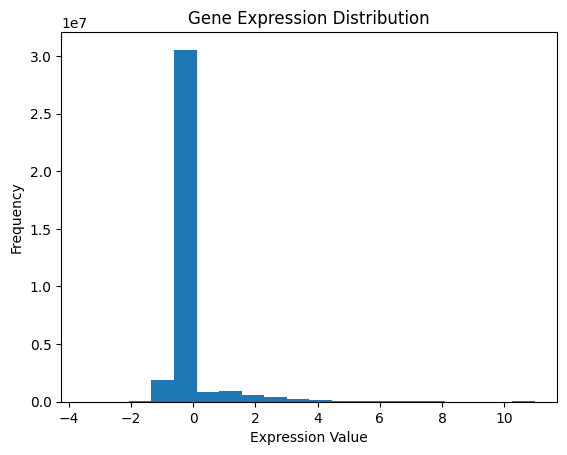

In [17]:
import matplotlib.pyplot as plt

# Get the gene expression values from the AnnData object
expression_data = train_data.X.flatten()

# Plot the histogram
plt.hist(expression_data, bins=20)

# Add labels and title
plt.xlabel('Expression Value')
plt.ylabel('Frequency')
plt.title('Gene Expression Distribution')

# Show the plot
plt.show()



In [18]:
pathway_path= '/content/BMI_7320_Tutorial/23_GBM_AP1/pathway/'

In [19]:
pathway_file_list=os.listdir(pathway_path)
pathway_file_list=[i for i in pathway_file_list if '.gmt' in i]

In [20]:
pathway_file_list

['c2.cp.reactome.v7.5.1.symbols.gmt',
 'GO_merged_non_redundant_full_term_name_gene_symbol_rename.gmt']

In [21]:
pathway_dict = read_gmt(pathway_path +pathway_file_list[0], min_g=0, max_g=1000)
print(train_data.shape, flush=True)

(3593, 10000)


In [30]:
len(pathway_dict)

1611

In [22]:
pathway_mask = create_pathway_mask(list(train_data.var.index), pathway_dict, add_missing=1, fully_connected=True)

In [26]:
pathway_mask.shape

(10000, 1612)

In [23]:
path_way_ind=[]
for i in range(pathway_mask.shape[0]):
    path_way_ind.append(np.argmax(pathway_mask[i,:]))

In [24]:
print(path_way_ind) # check all pathway not one the same dimension

[1611, 1611, 1611, 1611, 1611, 155, 5, 1611, 1611, 1611, 77, 1611, 190, 354, 1611, 1611, 1, 1611, 1611, 289, 1519, 329, 1156, 596, 155, 1611, 1611, 596, 76, 1611, 1611, 1611, 1611, 1611, 1611, 980, 1059, 1611, 1611, 1611, 77, 1611, 76, 1611, 1611, 2, 1144, 1239, 1611, 212, 1611, 1611, 359, 77, 5, 350, 520, 1611, 402, 115, 76, 1611, 1611, 1079, 1611, 1611, 1611, 1611, 349, 1079, 1, 580, 1611, 1611, 1611, 1611, 138, 626, 1611, 1611, 1611, 1611, 1611, 1611, 1611, 1611, 1611, 1611, 561, 561, 561, 1611, 1611, 1611, 1611, 1611, 118, 1611, 1611, 154, 31, 1611, 49, 596, 1611, 177, 77, 1006, 1611, 1611, 521, 1611, 2, 1611, 1611, 1611, 211, 1611, 150, 1611, 596, 1323, 1611, 634, 1611, 1611, 1611, 343, 1151, 1146, 1146, 1611, 374, 1611, 1611, 1611, 1611, 61, 634, 1611, 979, 1611, 1611, 1378, 1611, 31, 1611, 1611, 176, 374, 1611, 212, 1611, 1611, 1611, 1611, 1611, 1014, 76, 594, 1611, 167, 1611, 1611, 167, 1611, 1086, 1611, 76, 33, 104, 1611, 1611, 1611, 182, 1143, 596, 107, 1611, 1611, 1611, 1266

In [33]:
labels = train_data.obs['label'].values
le = preprocessing.LabelEncoder()
le.fit(labels)
y = torch.Tensor(le.transform(labels))

In [34]:
train_ds = torch.Tensor(train_data.X)
train_ds = UnsupervisedDataset(train_ds,y)

In [35]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.linewidth'] = .5
matplotlib.rcParams['lines.linewidth'] = .5
matplotlib.rcParams['patch.linewidth'] = .5
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
import seaborn as sns


In [36]:
vae = VEGA(pathway_mask=pathway_mask, positive_decoder=True)
#vae.load_state_dict(torch.load(path_models+'vega_kang_pbmc_fold_%s.pt'%(best_f), map_location=torch.device('cpu')))
# Set to eval
#vae.eval()

0.2
Constraining decoder to positive weights


In [38]:
LR = 1e-4
N_EPOCHS=20
p_drop = 0.5
dir_name='/content/BMI_7320_Tutorial/23_GBM_AP1/save_model'
model_prefix=pathway_file_list[0].split('.gmt')[0].split('.')[0].split('_')[0]+'_GBM' # change the number of pathway_file_list , the number should be the same with you choose before

In [39]:
kfold = KFoldTorch(cv=3, n_epochs=N_EPOCHS, lr=LR, train_p=10, test_p=10, num_workers=0, save_all=True, save_best=False, path_dir=dir_name, model_prefix='go__all')
dict_params = {'pathway_mask':pathway_mask, 'beta':0.0001, 'dropout':p_drop, 'path_model':None, 'device':'cpu', 'positive_decoder':True}
kfold.train_kfold(VEGA, dict_params, train_ds, batch_size=700)
np.save(dir_name+'5CV_vega_organoid.npy', kfold.cv_res_dict)



Model(s) will be saved at /content/BMI_7320_Tutorial/23_GBM_AP1/save_model/ using go__all as prefix
0.5
Constraining decoder to positive weights
cpu
Training fold 0
[Epoch 1] | loss: 8867.155 | test_loss: 8823.530 |
[Epoch 2] | loss: 8822.009 | test_loss: 8772.656 |
[Epoch 3] | loss: 8826.596 | test_loss: 8892.267 |
[Epoch 4] | loss: 8831.017 | test_loss: 8851.118 |
[Epoch 5] | loss: 8840.996 | test_loss: 8829.038 |
[Epoch 6] | loss: 8863.290 | test_loss: 8783.688 |
[Epoch 7] | loss: 8828.144 | test_loss: 8788.955 |
[Epoch 8] | loss: 8844.126 | test_loss: 8753.651 |
[Epoch 9] | loss: 8837.445 | test_loss: 8853.151 |
[Epoch 10] | loss: 8834.625 | test_loss: 8849.526 |
[Epoch 11] | loss: 8832.946 | test_loss: 8770.666 |
[Epoch 12] | loss: 8835.709 | test_loss: 8741.071 |
[Epoch 12] Early stopping
Saving model at /content/BMI_7320_Tutorial/23_GBM_AP1/save_model/go__allfold_0.pt
0.5
Constraining decoder to positive weights
cpu
Training fold 1
[Epoch 1] | loss: 8889.050 | test_loss: 8810.38

In [40]:
model = VEGA(pathway_mask, positive_decoder=False)
# Load the trained model weights
model.load_state_dict(torch.load('/content/BMI_7320_Tutorial/23_GBM_AP1/save_model/go__allfold_1.pt'))
# Set the model to evaluation mode
model.eval()
print(model)

0.2
VEGA(
  (encoder): Sequential(
    (0): Linear(in_features=10000, out_features=800, bias=True)
    (1): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=800, out_features=800, bias=True)
    (5): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
  )
  (mean): Sequential(
    (0): Linear(in_features=800, out_features=1612, bias=True)
    (1): Dropout(p=0.2, inplace=False)
  )
  (logvar): Sequential(
    (0): Linear(in_features=800, out_features=1612, bias=True)
    (1): Dropout(p=0.2, inplace=False)
  )
  (decoder): CustomizedLinear(input_features=1612, output_features=10000, bias=True)
)


In [41]:
print(train_data.uns_keys)

<bound method AnnData.uns_keys of AnnData object with n_obs × n_vars = 3593 × 10000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'primary.predict', 'secondary.predict', 'label'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_UMAP', 'X_pca'
    varm: 'PCs'
    obsp: 'distances'>


In [42]:
#print(train_data.obs.keys())
print(train_data.obs.keys())
for key in train_data.obs.keys():
    print(f"Contents of '{key}':")
    print(train_data.obs[key])
    print()  # Add an empty line for separation



Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT',
       'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'primary.predict',
       'secondary.predict', 'label'],
      dtype='object')
Contents of 'orig.ident':
T5224_10uM_3days_AAACCCACAACTGATC      T5224
T5224_10uM_3days_AAACGCTGTCGCATTA      T5224
T5224_10uM_3days_AAACGCTTCCCTTCCC      T5224
T5224_10uM_3days_AAAGAACCACCTCGTT      T5224
T5224_10uM_3days_AAAGGTATCCGGCTTT      T5224
                                      ...   
Control_3days_TTTGTTGCAGTTGGTT       Control
Control_3days_TTTGTTGGTCTCAGGC       Control
Control_3days_TTTGTTGGTTACGATC       Control
Control_3days_TTTGTTGTCCAATCTT       Control
Control_3days_TTTGTTGTCCGTGGTG       Control
Name: orig.ident, Length: 3593, dtype: object

Contents of 'nCount_RNA':
T5224_10uM_3days_AAACCCACAACTGATC    2969.0
T5224_10uM_3days_AAACGCTGTCGCATTA    1087.0
T5224_10uM_3days_AAACGCTTCCCTTCCC    1063.0
T5224_10uM_3days_AAAGAACCACCTCGTT    1077.0
T5224_10uM_3days_AAAGGTAT

In [43]:
print(train_data)  # Print the train_data object to inspect its structure and contents
print(train_data.obsm.keys())  # Print the keys in the obsm attribute

AnnData object with n_obs × n_vars = 3593 × 10000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'primary.predict', 'secondary.predict', 'label'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_UMAP', 'X_pca'
    varm: 'PCs'
    obsp: 'distances'
KeysView(AxisArrays with keys: X_UMAP, X_pca)


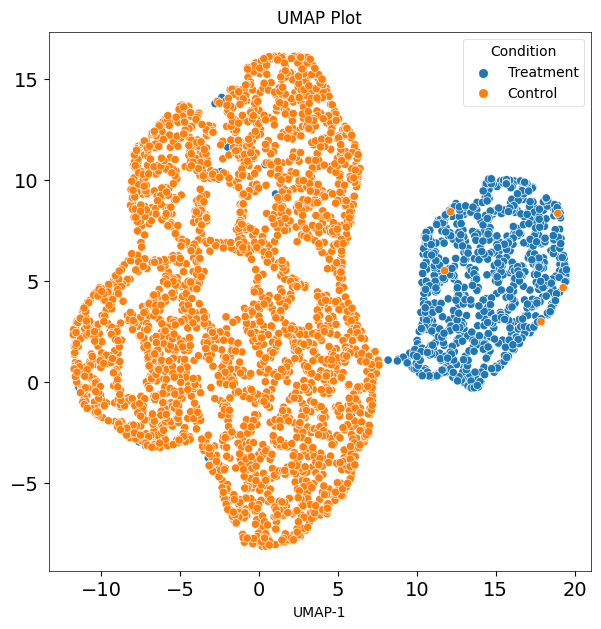

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc

# Store the chosen latent representation in the 'obsm' attribute
train_data.obsm['X_latent'] = train_data.obsm['X_UMAP']  # or X_pca or X_umap

# Perform UMAP computation using the chosen latent representation
sc.pp.neighbors(train_data, use_rep='X_latent', n_neighbors=15)
sc.tl.umap(train_data, min_dist=0.5, random_state=42)

# Store UMAP coordinates in the 'uns' attribute
train_data.uns['X_umap'] = train_data.obsm['X_umap']

umap_df = pd.DataFrame({'UMAP-1': train_data.obsm['X_umap'][:, 0],
                        'UMAP-2': train_data.obsm['X_umap'][:, 1],
                        'Cell Type': train_data.obs['label'],
                        'Condition': train_data.obs['label']})

fig, ax = plt.subplots(figsize=[7, 7])
sns.scatterplot(data=umap_df, x='UMAP-1', y='UMAP-2', hue='Condition', ax=ax)

plt.xlabel('UMAP-1')
plt.ylabel('')
plt.title('UMAP Plot')
plt.show()


In [46]:
import pandas as pd
import scanpy as sc

train_data.obsm['X_latent'] = train_data.obsm['X_UMAP']

# Perform UMAP computation using the chosen latent representation
sc.pp.neighbors(train_data, use_rep='X_latent', n_neighbors=15)
sc.tl.umap(train_data, min_dist=0.5, random_state=42)

# Access the latent representation
latent_data = train_data.obsm['X_latent']

# Convert the latent representation to a DataFrame
latent_df = pd.DataFrame(latent_data, columns=['Latent-1', 'Latent-2'])

print(latent_df)


      Latent-1  Latent-2
0    -4.031179 -0.307985
1    -3.871143  0.766873
2    -8.369262  0.865201
3     3.552633  4.929954
4    -9.514554 -1.000121
...        ...       ...
3588  4.065451 -0.068586
3589 -1.234240  3.030425
3590  6.915635  2.315115
3591  3.735442  2.369289
3592  0.110529 -3.056699

[3593 rows x 2 columns]


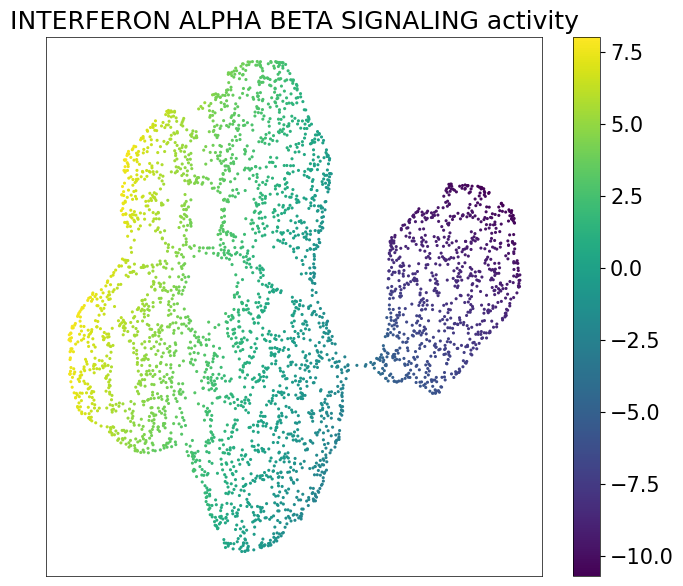

In [48]:
train_data.obs['Interferon alpha beta signaling activity'] = train_data.obsm['X_UMAP'][:, 0]

fig, ax = plt.subplots(figsize=[8, 7])
sct = ax.scatter(
    train_data.obsm['X_umap'][:, 0], train_data.obsm['X_umap'][:, 1],
    alpha=1, linewidths=0, c=train_data.obs['Interferon alpha beta signaling activity'],
    marker='o', s=5, cmap='viridis', rasterized=True
)
cbar = fig.colorbar(sct, ax=ax)
for t in cbar.ax.get_yticklabels():
    t.set_fontsize(15)
ax.set_title('INTERFERON ALPHA BETA SIGNALING activity', fontsize=18)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('')
plt.savefig('/content/BMI_7320_Tutorial/23_GBM_AP1/save_model' +'umap_ifn.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()



In [49]:
train_data.obs.keys()

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT',
       'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'primary.predict',
       'secondary.predict', 'label',
       'Interferon alpha beta signaling activity'],
      dtype='object')

In [86]:
print(train_data)
#print(dir(train_data))
print(train_data.obs['Interferon alpha beta signaling activity'])


AnnData object with n_obs × n_vars = 3593 × 10000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'primary.predict', 'secondary.predict', 'label', 'Interferon alpha beta signaling activity'
    var: 'features'
    uns: 'neighbors', 'umap', 'X_umap', 'rank_genes_groups'
    obsm: 'X_UMAP', 'X_pca', 'X_latent', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'
T5224_10uM_3days_AAACCCACAACTGATC   -4.031179
T5224_10uM_3days_AAACGCTGTCGCATTA   -3.871143
T5224_10uM_3days_AAACGCTTCCCTTCCC   -8.369262
T5224_10uM_3days_AAAGAACCACCTCGTT    3.552633
T5224_10uM_3days_AAAGGTATCCGGCTTT   -9.514554
                                       ...   
Control_3days_TTTGTTGCAGTTGGTT       4.065451
Control_3days_TTTGTTGGTCTCAGGC      -1.234240
Control_3days_TTTGTTGGTTACGATC       6.915635
Control_3days_TTTGTTGTCCAATCTT       3.735442
Control_3days_TTTGTTGTCCGTGGTG       0.110529
Name: Interferon alpha beta signaling activit